In [230]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 

In [231]:
data = pd.read_csv('MDD_Dataset_PSD_and_SNR.csv')
coords = pd.read_excel('AudioMothPeru_Coordinates.xlsx', engine='openpyxl')

In [232]:
m = folium.Map(location=[-11.24880531,-70.18012927],
              )
# trying to style it to look nicer, but lets get the images on the map first
# zoom_start=12,
#              tiles='https://api.mapbox.com/styles/v1/nishantbalaji/ckoqa9o9x35hd18qe8rpnlsug/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoibmlzaGFudGJhbGFqaSIsImEiOiJja2xkOGl3cjcxc21yMndtdmxtZWpxeGRuIn0.isOPq2BjpvuzwjZMXW1yWA',
#              attr='Mapbox'

In [233]:
data

,AudioMothCode,AudioMothID,SourceFile,Directory,FileName,FileSize,Encoding,NumChannels,SampleRate,AvgBytesPerSec,...,Comment,Artist,FileCreateDate,FileType,MIMEType,LOWER_FREQUENCY,UPPER_FREQUENCY,PSD,SNR,HourDecTime
0,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_145649.WAV,GRABADOR-SDZG-AM-1,20190616_145649.WAV,1802240,1,1,384000,768000,...,Recorded at 14:56:49 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:11-08:00,WAV,audio/x-wav,600,1200,9.79,2.43,14.933333
1,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_150000.WAV,GRABADOR-SDZG-AM-1,20190616_150000.WAV,46080360,1,1,384000,768000,...,Recorded at 15:00:00 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:11-08:00,WAV,audio/x-wav,600,1200,17.12,3.23,15.000000
2,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_151000.WAV,GRABADOR-SDZG-AM-1,20190616_151000.WAV,46080360,1,1,384000,768000,...,Recorded at 15:10:00 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:13-08:00,WAV,audio/x-wav,600,1200,-3.68,-0.40,15.166667
3,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_152000.WAV,GRABADOR-SDZG-AM-1,20190616_152000.WAV,46080360,1,1,384000,768000,...,Recorded at 15:20:00 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:15-08:00,WAV,audio/x-wav,600,1200,2.78,1.30,15.333333
4,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_153000.WAV,GRABADOR-SDZG-AM-1,20190616_153000.WAV,46080360,1,1,384000,768000,...,Recorded at 15:30:00 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:16-08:00,WAV,audio/x-wav,600,1200,0.02,0.01,15.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93669,WWF-5,NaN,GRABADOR-WWF-5/5D2FC490.WAV,GRABADOR-WWF-5,5D2FC490.WAV,46080192,1,1,384000,768000,...,Recorded at 01:00:00 18/07/2019 (UTC) by Audio...,NaN,2019:12:07 17:19:33-08:00,WAV,audio/x-wav,600,1200,-2.05,-0.42,1.000000
93670,WWF-5,NaN,GRABADOR-WWF-5/5D2FCB98.WAV,GRABADOR-WWF-5,5D2FCB98.WAV,46080192,1,1,384000,768000,...,Recorded at 01:30:00 18/07/2019 (UTC) by Audio...,NaN,2019:12:07 17:19:38-08:00,WAV,audio/x-wav,600,1200,-2.08,-0.38,1.500000
93671,WWF-5,NaN,GRABADOR-WWF-5/5D2FCDF0.WAV,GRABADOR-WWF-5,5D2FCDF0.WAV,46080192,1,1,384000,768000,...,Recorded at 01:40:00 18/07/2019 (UTC) by Audio...,NaN,2019:12:07 17:19:43-08:00,WAV,audio/x-wav,600,1200,-1.97,-0.41,1.666667
93672,WWF-5,NaN,GRABADOR-WWF-5/5D2FD750.WAV,GRABADOR-WWF-5,5D2FD750.WAV,46080192,1,1,384000,768000,...,Recorded at 02:20:00 18/07/2019 (UTC) by Audio...,NaN,2019:12:07 17:19:49-08:00,WAV,audio/x-wav,600,1200,-1.85,-0.32,2.333333


In [234]:
data.drop(columns=['SourceFile', 'Directory', 'FileSize', 'AudioMothID', 
                   'Encoding', 'NumChannels', 'SampleRate', 'AvgBytesPerSec',
                   'BitsPerSample', 'Artist', 'FileType', 'MIMEType', 'LOWER_FREQUENCY',
                   'UPPER_FREQUENCY', 'Error'])
data.drop(data[data['AudioMothCode']  == 'AM-18'].index, inplace=True)
data

,AudioMothCode,AudioMothID,SourceFile,Directory,FileName,FileSize,Encoding,NumChannels,SampleRate,AvgBytesPerSec,...,Comment,Artist,FileCreateDate,FileType,MIMEType,LOWER_FREQUENCY,UPPER_FREQUENCY,PSD,SNR,HourDecTime
0,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_145649.WAV,GRABADOR-SDZG-AM-1,20190616_145649.WAV,1802240,1,1,384000,768000,...,Recorded at 14:56:49 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:11-08:00,WAV,audio/x-wav,600,1200,9.79,2.43,14.933333
1,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_150000.WAV,GRABADOR-SDZG-AM-1,20190616_150000.WAV,46080360,1,1,384000,768000,...,Recorded at 15:00:00 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:11-08:00,WAV,audio/x-wav,600,1200,17.12,3.23,15.000000
2,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_151000.WAV,GRABADOR-SDZG-AM-1,20190616_151000.WAV,46080360,1,1,384000,768000,...,Recorded at 15:10:00 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:13-08:00,WAV,audio/x-wav,600,1200,-3.68,-0.40,15.166667
3,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_152000.WAV,GRABADOR-SDZG-AM-1,20190616_152000.WAV,46080360,1,1,384000,768000,...,Recorded at 15:20:00 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:15-08:00,WAV,audio/x-wav,600,1200,2.78,1.30,15.333333
4,AM-1,243B1F055B2BEAB8,GRABADOR-SDZG-AM-1/20190616_153000.WAV,GRABADOR-SDZG-AM-1,20190616_153000.WAV,46080360,1,1,384000,768000,...,Recorded at 15:30:00 16/06/2019 (UTC) by Audio...,AudioMoth 243B1F055B2BEAB8,2019:12:20 03:13:16-08:00,WAV,audio/x-wav,600,1200,0.02,0.01,15.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93669,WWF-5,NaN,GRABADOR-WWF-5/5D2FC490.WAV,GRABADOR-WWF-5,5D2FC490.WAV,46080192,1,1,384000,768000,...,Recorded at 01:00:00 18/07/2019 (UTC) by Audio...,NaN,2019:12:07 17:19:33-08:00,WAV,audio/x-wav,600,1200,-2.05,-0.42,1.000000
93670,WWF-5,NaN,GRABADOR-WWF-5/5D2FCB98.WAV,GRABADOR-WWF-5,5D2FCB98.WAV,46080192,1,1,384000,768000,...,Recorded at 01:30:00 18/07/2019 (UTC) by Audio...,NaN,2019:12:07 17:19:38-08:00,WAV,audio/x-wav,600,1200,-2.08,-0.38,1.500000
93671,WWF-5,NaN,GRABADOR-WWF-5/5D2FCDF0.WAV,GRABADOR-WWF-5,5D2FCDF0.WAV,46080192,1,1,384000,768000,...,Recorded at 01:40:00 18/07/2019 (UTC) by Audio...,NaN,2019:12:07 17:19:43-08:00,WAV,audio/x-wav,600,1200,-1.97,-0.41,1.666667
93672,WWF-5,NaN,GRABADOR-WWF-5/5D2FD750.WAV,GRABADOR-WWF-5,5D2FD750.WAV,46080192,1,1,384000,768000,...,Recorded at 02:20:00 18/07/2019 (UTC) by Audio...,NaN,2019:12:07 17:19:49-08:00,WAV,audio/x-wav,600,1200,-1.85,-0.32,2.333333


In [235]:
devices_PSD = {}
devices_SNR = {}
devices_time = {}
devices_list = data.drop_duplicates(subset=['AudioMothCode']).loc[:,'AudioMothCode'].values

In [237]:
def Average(lst): 
    return sum(lst) / len(lst)

In [252]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [239]:
# Add the PSD and SNR values to their corresponding audiomoths
PSD_averages = []
SNR_averages = []
for name in devices_list:
    dictPSD = {}
    dictSNR = {}
    dicttime = {}
    dictPSD['AudioMothCode'] = name
    dictPSD['values'] = data[data['AudioMothCode'] == name].loc[:,'PSD'].values
    dictPSD['Average PSD'] = Average(dictPSD['values'])
    devices_PSD[name] = dictPSD
    PSD_averages.append(Average(dictPSD['values']))
    
    dictSNR['AudioMothCode'] = name
    dictSNR['values'] = data[data['AudioMothCode'] == name].loc[:,'SNR'].values
    dictSNR['Average SNR'] = Average(dictSNR['values'])
    devices_SNR[name] = dictSNR
    SNR_averages.append(Average(dictSNR['values']))
    
    dicttime['AudioMothCode'] = name
    dicttime['values'] = data[data['AudioMothCode'] == name].loc[:,'HourDecTime'].values
    dicttime['average'] = Average(dictPSD['values'])
#     dicttime['values'] = list(map(int, dicttime['values']))
    devices_time[name] = dicttime


In [240]:
PSD_BAR = pd.DataFrame(devices_PSD, columns = devices_list)
PSD_BAR = PSD_BAR.drop('values')
PSD_BAR = PSD_BAR.T

In [241]:
PSD_BAR

,AudioMothCode,Average PSD
AM-1,AM-1,-10.532628
AM-10,AM-10,-8.271075
AM-11,AM-11,-6.465989
AM-12,AM-12,-10.965119
AM-13,AM-13,-5.783486
AM-14,AM-14,-5.517449
AM-15,AM-15,-8.164888
AM-16,AM-16,-5.552673
AM-17,AM-17,-6.478818
AM-2,AM-2,-8.693199


<AxesSubplot:xlabel='AudioMothCode', ylabel='Average PSD'>

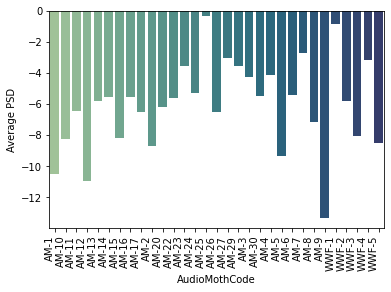

In [262]:
APSD = sns.barplot(x='AudioMothCode', y='Average PSD', data=PSD_BAR, palette="crest")
APSD.set_xticklabels(APSD.get_xticklabels(), rotation=90, horizontalalignment='right')
APSD

In [204]:
SNR_BAR = pd.DataFrame(devices_SNR, columns = devices_list)
SNR_BAR = SNR_BAR.drop('values')
SNR_BAR = SNR_BAR.T

In [205]:
SNR_BAR

,AudioMothCode,Average SNR
AM-1,AM-1,-0.404062
AM-10,AM-10,-0.177168
AM-11,AM-11,-0.230209
AM-12,AM-12,-0.218542
AM-13,AM-13,-0.312982
AM-14,AM-14,-0.280953
AM-15,AM-15,-0.346471
AM-16,AM-16,-0.19205
AM-17,AM-17,-0.289153
AM-2,AM-2,-0.413909


<AxesSubplot:xlabel='AudioMothCode', ylabel='Average SNR'>

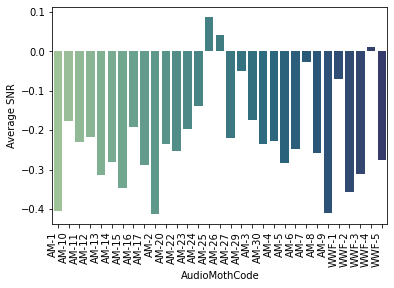

In [264]:
ASNR = sns.barplot(x='AudioMothCode', y='Average SNR', data=SNR_BAR, palette="crest")
ASNR.set_xticklabels(ASNR.get_xticklabels(), rotation=90, horizontalalignment='right')
ASNR

In [171]:
# sns.catplot(x=PSD_BAR.columns, kind="count", data=PSD_BAR)

In [122]:
# flights = pd.DataFrame(devices_PSD, columns = devices_list)
# flights = flights.pivot("AudioMothCode", "HourDecTime", "PSD")
# ax = sns.heatmap(flights)

In [68]:
m